In [1]:
import pandas as pd

/var/folders/10/ccq12_zj4fn_b0gnfljppcj80000gn/T/ipykernel_14790/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data= pd.read_csv('boston.csv')

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# the data that we're gonna be predicting(LSTAT- % of popultaion with lower status, MEDV - median price of homes)
data1 = data.loc[:, ['LSTAT', 'MEDV']]
data1.head(5)

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


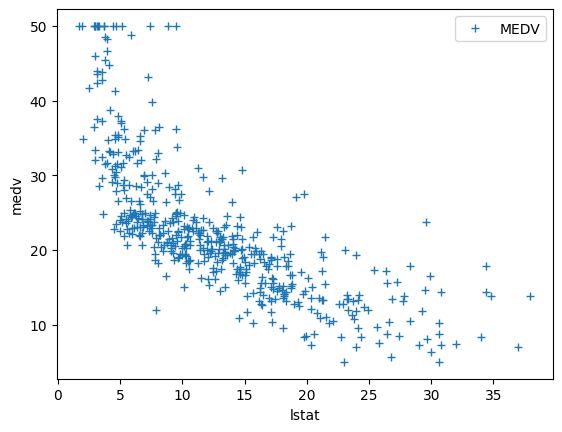

In [5]:
import matplotlib.pyplot as plt
data.plot(x = 'LSTAT', y = 'MEDV', style = '+')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()


In [6]:
x = pd.DataFrame(data['LSTAT'])
Y = pd.DataFrame(data['MEDV'])



In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,Y,  test_size=0.2,)

In [24]:
# the model training
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [25]:
# the Y intercept
reg.intercept_

array([34.23975975])

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary



2024-02-11 23:54:18.000308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-11 23:54:18.003007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-11 23:54:18.004793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x149fa6e20>>

In [27]:
reg.fit(xtrain, ytrain)
accu = reg.score(xtest, ytest)
accu

0.568685162735673

In [42]:

y_pred = reg.predict(xtest)

ypre = pd.DataFrame(data=y_pred, columns=['YPRED'])
ypre.head(15)

,YPRED
0,26.417309
1,30.619452
2,14.124886
3,22.030456
4,11.234181
5,22.196695
6,18.991984
7,25.724648
8,25.660000
9,29.160246


In [32]:
ytest.head()

,MEDV
15,19.9
228,46.7
379,10.2
464,21.4
477,12.0
